In [2]:
%load_ext autoreload
%autoreload 2
from utils import *

In [3]:
df = pd.read_csv("breast_cancer.csv")

In [4]:
df.sample(5)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
156,no-recurrence-events,50-59,ge40,25-29,3-5,yes,3,right,left_up,no
86,no-recurrence-events,60-69,ge40,25-29,0-2,no,2,right,left_low,no
178,no-recurrence-events,50-59,premeno,25-29,3-5,no,2,right,left_up,yes
31,no-recurrence-events,50-59,premeno,15-19,0-2,no,2,right,left_low,no
230,recurrence-events,50-59,premeno,50-54,9-11,yes,2,right,left_up,no


In [5]:
df.shape

(286, 10)

In [6]:
print("class : ", np.unique(df['class'].values))
print("age : ", np.unique(df['age'].values))
print("menopause : ", np.unique(df['menopause'].values))
print("tumor-size : ", np.unique(df['tumor-size'].values))
print("inv-nodes : ", np.unique(df['inv-nodes'].values))
print("node-caps : ", np.unique(df['node-caps'].values))
print("deg-malig : ", np.unique(df['deg-malig'].values))
print("breast : ", np.unique(df['breast'].values))
print("breast-quad : ", np.unique(df['breast-quad'].values))
print("irradiat : ", np.unique(df['irradiat'].values))

class :  ['no-recurrence-events' 'recurrence-events']
age :  ['20-29' '30-39' '40-49' '50-59' '60-69' '70-79']
menopause :  ['ge40' 'lt40' 'premeno']
tumor-size :  ['0-4' '10-14' '15-19' '20-24' '25-29' '30-34' '35-39' '40-44' '45-49'
 '5-9' '50-54']
inv-nodes :  ['0-2' '12-14' '15-17' '24-26' '3-5' '6-8' '9-11']
node-caps :  ['?' 'no' 'yes']
deg-malig :  [1 2 3]
breast :  ['left' 'right']
breast-quad :  ['?' 'central' 'left_low' 'left_up' 'right_low' 'right_up']
irradiat :  ['no' 'yes']


In [7]:
df = df[(df['node-caps'] != '?') & (df['breast-quad'] != '?')]
df.shape

(277, 10)

In [8]:
df.loc[df['class'] == 'recurrence-events','class'] = 1
df.loc[df['class'] == 'no-recurrence-events','class'] = 2

In [9]:
df.loc[df['age'] == '20-29','age'] = 1
df.loc[df['age'] == '30-39','age'] = 2
df.loc[df['age'] == '40-49','age'] = 3
df.loc[df['age'] == '50-59','age'] = 4
df.loc[df['age'] == '60-69','age'] = 5
df.loc[df['age'] == '70-79','age'] = 6

In [10]:
df.loc[df['menopause'] == 'lt40','menopause'] = 1
df.loc[df['menopause'] == 'ge40','menopause'] = 2
df.loc[df['menopause'] == 'premeno','menopause'] = 3

In [11]:
tumorsize_values = np.array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54'])

for i in range(len(tumorsize_values)):
    tumorsize = tumorsize_values[i]
    df.loc[df['tumor-size'] == tumorsize, 'tumor-size'] = i+1

In [12]:
invnodes_values = np.array(['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '24-26'])

for i in range(len(invnodes_values)):
    invnode = invnodes_values[i]
    df.loc[df['inv-nodes'] == invnode, 'inv-nodes'] = i+1

In [13]:
df.loc[df['node-caps'] == 'no','node-caps'] = 0
df.loc[df['node-caps'] == 'yes','node-caps'] = 1

In [14]:
df.loc[df['irradiat'] == 'no','irradiat'] = 0
df.loc[df['irradiat'] == 'yes','irradiat'] = 1

In [15]:
df.drop(['breast', 'breast-quad'], axis=1, inplace=True) # keep ordinal values only
df.sample(5)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,irradiat
67,2,4,2,5,1,0,3,0
135,2,2,3,5,2,0,2,0
165,2,3,3,5,2,0,2,0
214,1,5,2,9,1,0,2,0
232,1,2,3,7,2,0,3,1


In [16]:
vectors = df.values

In [17]:
vectors.shape

(277, 8)

In [18]:
vectors[:,1:]

array([[2, 3, 7, ..., 0, 3, 0],
       [3, 3, 5, ..., 0, 2, 0],
       [3, 3, 5, ..., 0, 2, 0],
       ...,
       [5, 2, 5, ..., 0, 1, 0],
       [3, 2, 7, ..., 0, 3, 0],
       [4, 2, 7, ..., 0, 3, 0]])

In [19]:
dataset = LabeledSet(7)
dataset.addExamples(vectors[:,1:], vectors[:,0:1])

In [20]:
g = Log()
h = Sum()

# rank Shannon discrimination measure
f_r = Dsr()
rsdm = Gdm(h, g, f_r)

# conditional Shannon entropy
f = Ds()
sdm = Gdm(h, g, f)

# pessimistic rank discrimination measure
f_p = Mindsr()
g_p = Frac() 
prdm = Gdm(h, g_p, f_p)

In [85]:
train_set, test_set = split_dataset(dataset, 80)

In [257]:
df.index.values

array([0, 1, 2, 3, 4])

In [258]:
grouped = df.groupby(df[0], axis=0)

In [259]:
for g in grouped.groups: # indices des éléments ayant cet attribut
    print(g, type(g))

2 <class 'int'>
3 <class 'int'>
4 <class 'int'>


In [260]:
grouped.groups

{2: Int64Index([0, 1, 2], dtype='int64'),
 3: Int64Index([3], dtype='int64'),
 4: Int64Index([4], dtype='int64')}

In [293]:
dsa = np.ones((5, 5))
esa = np.ones((5, 5))

In [256]:
a = np.array([[4, 1], [2, 1], [2, 2], [2, 2], [3, 2]])
a = np.hstack((a, np.reshape(np.arange(5), (5,1))))
a = np.sort(a.view([('',a.dtype)]*a.shape[1]),0).view(a.dtype)
df = pd.DataFrame(a)
df

,0,1,2
0,2,1,1
1,2,2,2
2,2,2,3
3,3,2,4
4,4,1,0


In [301]:
x = np.ones(5)
x

array([1., 1., 1., 1., 1.])

In [302]:
unique = np.unique(a[:,0])

visited_ind = []
total_ind = np.arange(0,5)

for i in range(len(unique)-1):
    current = unique[i]
    current_group = grouped.groups[current].values
    current_labels = np.unique(a[current_group, 1])
    
    lookahead = unique[i+1]
    lookahead_group = grouped.groups[lookahead]
    lookahead_labels = np.unique(a[lookahead_group,1])

    x[a[current_group, 2]] = 0
    visited_ind.extend(a[current_group, 2].tolist())
    
    c = np.zeros((5,))
    c[visited_ind] = 1
    dsa[visited_ind] = np.ones((5,))
    esa[visited_ind] = c
    
    nvind = list(set(total_ind) - set(visited_ind))
    c = np.zeros((5,))
    c[nvind] = 1
    
    dsa[nvind] = c
    esa[nvind] = c
    
print(dsa)
print(esa)
    

[[1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]]


In [303]:
x

array([1., 0., 0., 0., 0.])

In [289]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [288]:
list(set([1, 3, 4]) - set([1]))

[3, 4]

In [244]:
c = np.array([1, 2])
d = np.array([2])
np.setdiff1d(d, c)

array([], dtype=int64)

In [322]:
ceil(train_set.size() * 0.01)

3

In [332]:
tree1 = RDMT(rsdm, "shannon", 0, 100, ceil(0.01 * train_set.size()), [1, 2])
tree1.train(train_set)
tree1.accuracy(test_set)

9 10
1 4
3 4
7 10
3 4
1 3
2 3
4 6
8 10
30 49
2 2
3 3
21 39
6 19
1 6
1 4
4 17
3 11
3 8
6 17
6 20
8 26
1 6
1 4
2 6
8 27
12 27
14 27
18 36
2 2
3 4
3 5
3 6
4 9
1 3
32 65
2 10
1 7
1 6
1 5
1 3
1 8
2 16
64 156
22 65
11 33
11 32
2 11
2 6
2 3
2 12
3 15
1 3
5 23
2 8
6 24
8 25
11 31
1 6
3 6
22 62
11 29
11 28
4 23
2 14
1 9
1 4
1 3
2 10
4 18
1 3
2 4
5 23
7 24
8 25
9 25
11 26
29 83
1 5
1 4
1 3
3 10
2 5
2 4
4 12
6 12
7 16
1 3
1 4
7 18
30 84
31 84
32 86
32 88
32 91


0.5789473684210527

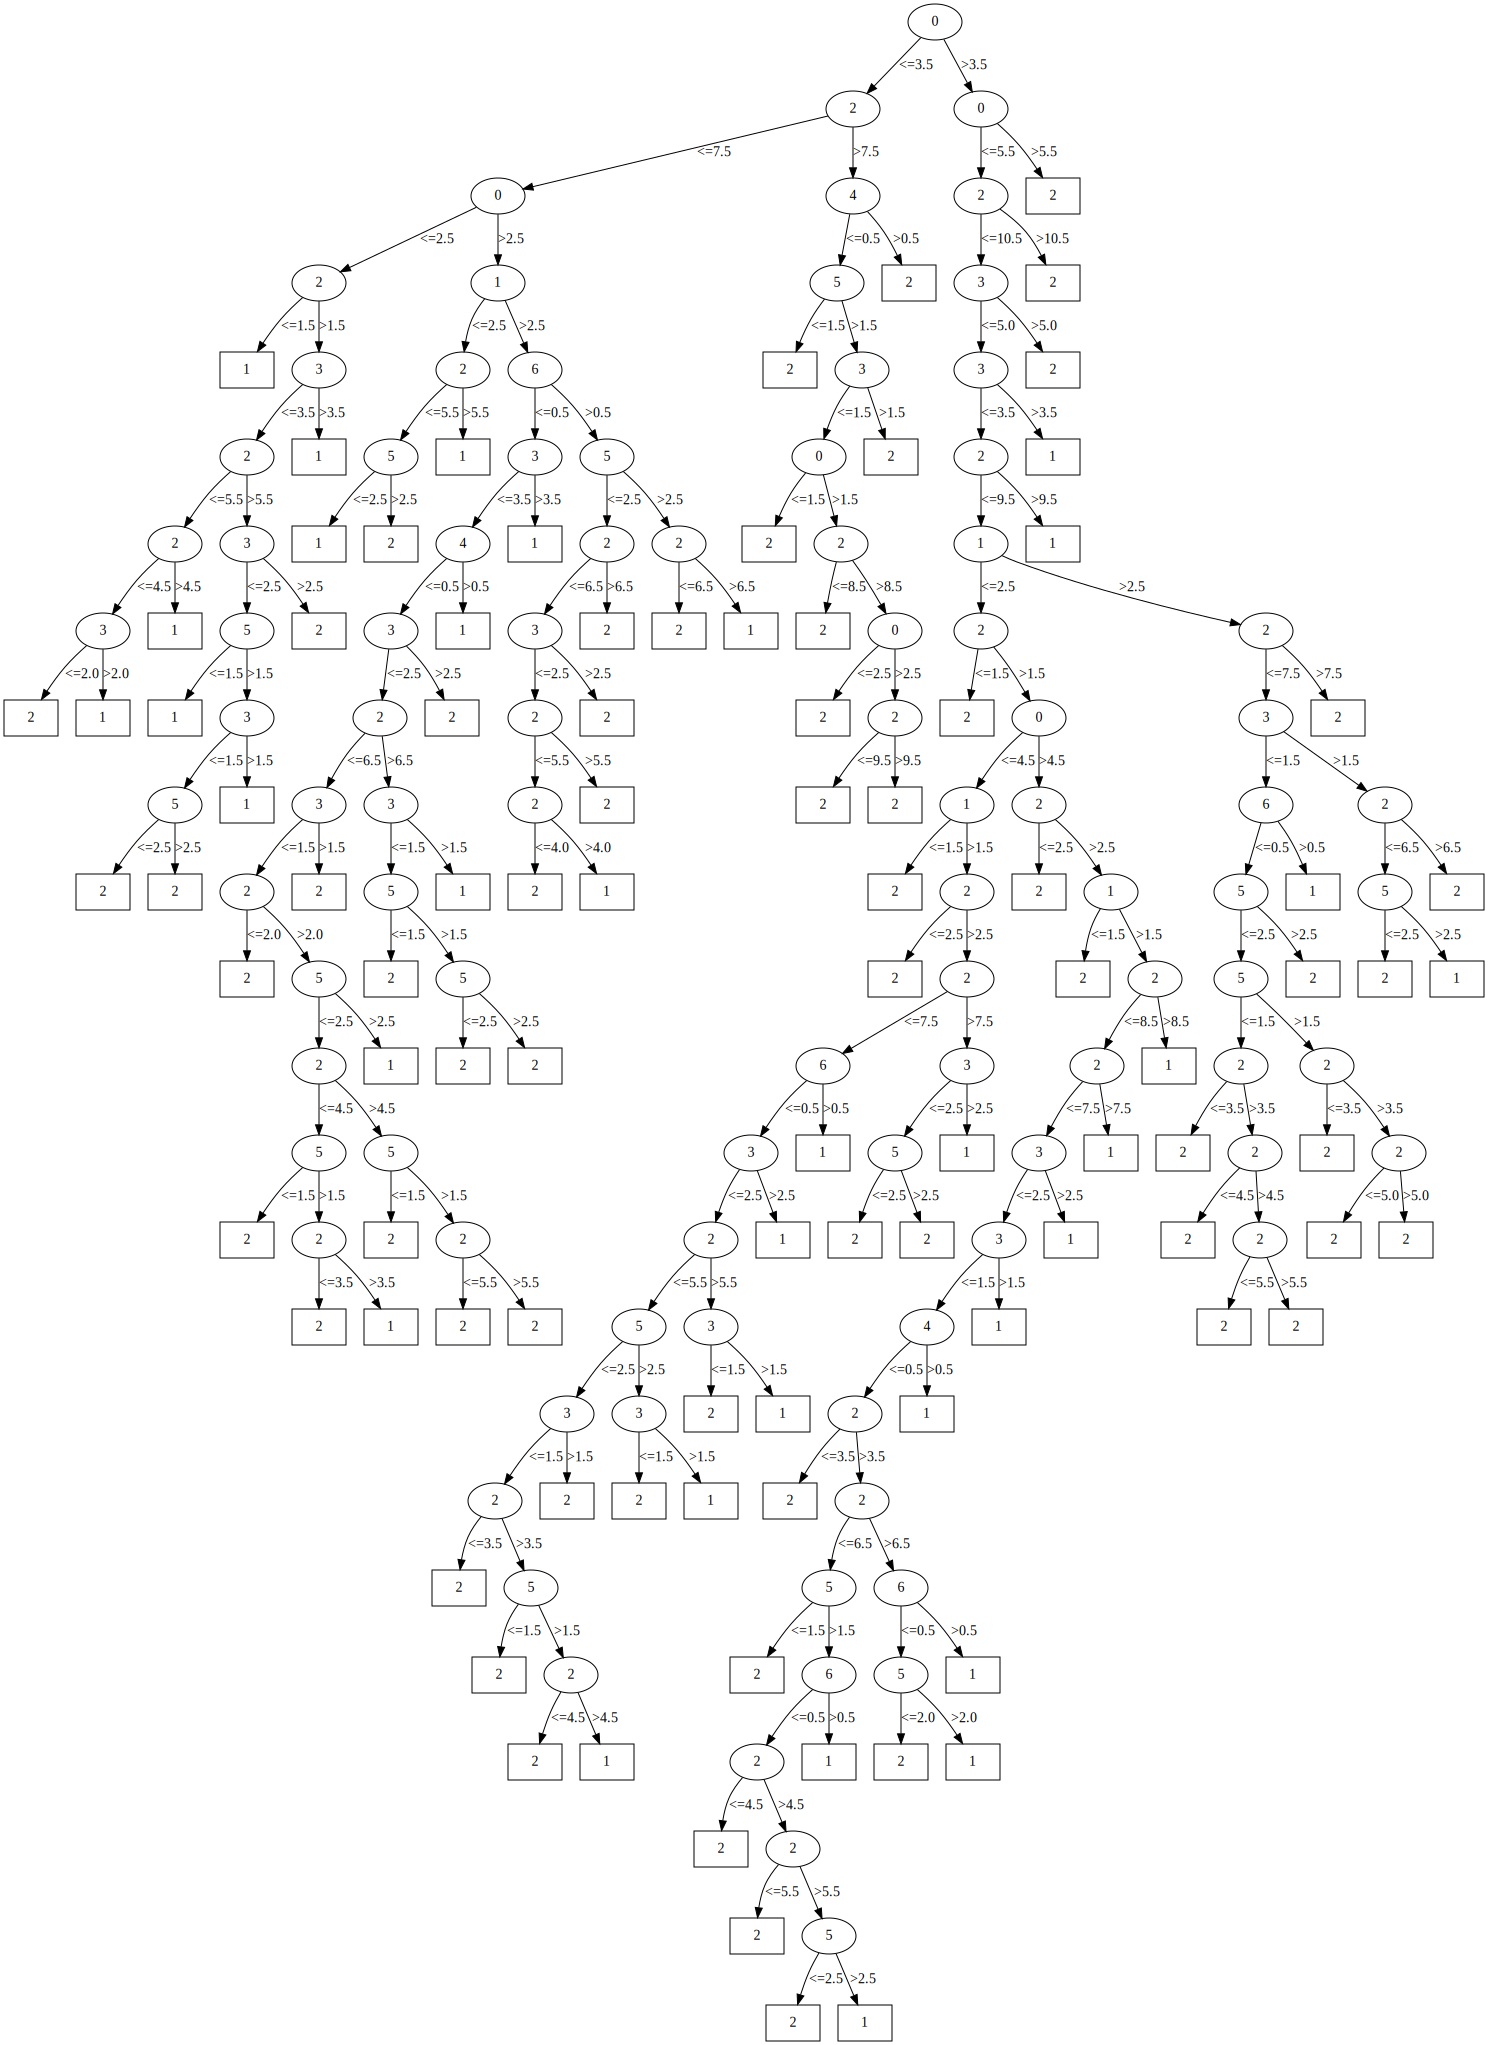

In [333]:
tree1.plot()